# A project on Data Science Salaries.

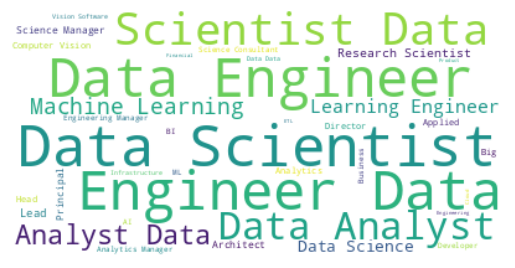

Everyone is talking about data now. Whether it's data analysis or data engineering, they all belong to the big data family. Some people go as far as saying that data science is the future.

Is data science actually the future?? Let's find out in the quick analysis!

I am going to be analysing data on data science salaries. This dataset was gotten from Kaggle. I am going to begin with a quick data import and then proceed to cleaning the datset.

In [1]:
# Import modules

import pandas as pd
import numpy as np

In [2]:
# Importing dataset

df = pd.read_csv("../input/data-science-job-salaries/ds_salaries.csv")

## Step 1: Data Cleaning

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# Removing duplicate columns

df = df.drop(['Unnamed: 0'], axis = 1)

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


Our dataset contains no missing values. I will now inspect the individual colums for inconsistencies.

In [6]:
col_list = list(df.columns)

for col in col_list:
    print("{}: {}".format(col, df[col].dtype))

work_year: int64
experience_level: object
employment_type: object
job_title: object
salary: int64
salary_currency: object
salary_in_usd: int64
employee_residence: object
remote_ratio: int64
company_location: object
company_size: object


All the datatypes above are consistent with my data dictionary. This concludes the data cleaning phase. I didn't have to do much here since the data had already been pre-prcessed. I'll now proceed to performing Exploratory Data Analysis on my dataset.

## Step 2: Exploratory Data Analysis.

### Statistical Analysis

In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


This dataframe shows the result of performing some basic statistical analysis on the dataset. I can draw that the least salary in US Dollars is 2859 and the highest salary is 600000 US Dollars. I can also clearly view what the mean and standard deviations of other columns are.

In [8]:
# Which job paid the minimum salary

df[df['salary_in_usd']==df['salary_in_usd'].min()]['job_title']

176    Data Scientist
Name: job_title, dtype: object

In [9]:
# Which job paid the maximum salary

df[df['salary_in_usd']==df['salary_in_usd'].max()]['job_title']

252    Principal Data Engineer
Name: job_title, dtype: object

In [10]:
import matplotlib.pyplot as plt

In [11]:
# Which countries pay the most for data-related jobs

df.groupby('company_location')['salary_in_usd'].agg(np.mean).sort_values(ascending=False).head(10)


company_location
RU    157500.000000
US    144055.261972
NZ    125000.000000
IL    119059.000000
JP    114127.333333
AU    108042.666667
AE    100000.000000
DZ    100000.000000
IQ    100000.000000
CA     99823.733333
Name: salary_in_usd, dtype: float64

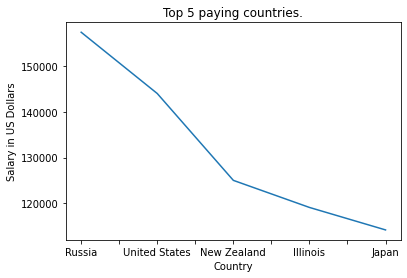

In [12]:
ax = df.groupby('company_location')['salary_in_usd'].agg(np.mean).sort_values(ascending=False).head(5).plot()
plt.title("Top 5 paying countries.")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Russia'
labels[3] = 'United States'
labels[5] = 'New Zealand'
labels[7] = 'Illinois'
labels[9] = 'Japan'
ax.set_xticklabels(labels)
plt.xlabel("Country")
plt.ylabel("Salary in US Dollars")
plt.show()

In [13]:
# Which countries pay the least for data-related jobs

df.groupby('company_location')['salary_in_usd'].agg(np.mean).sort_values().head(10)

company_location
VN     4000.000000
IR     4000.000000
KE     9272.000000
PK    13333.333333
UA    13400.000000
MD    18000.000000
AS    18053.000000
BR    18602.666667
HN    20000.000000
TR    20096.666667
Name: salary_in_usd, dtype: float64

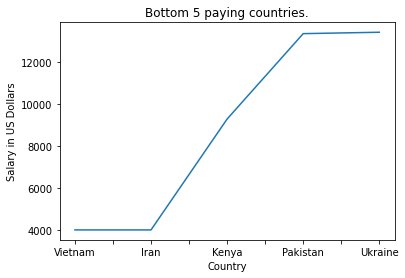

In [14]:
ax = df.groupby('company_location')['salary_in_usd'].agg(np.mean).sort_values().head(5).plot()
plt.title("Bottom 5 paying countries.")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Vietnam'
labels[3] = 'Iran'
labels[5] = 'Kenya'
labels[7] = 'Pakistan'
labels[9] = 'Ukraine'
ax.set_xticklabels(labels)
plt.xlabel("Country")
plt.ylabel("Salary in US Dollars")
plt.show()

### Data Visualizations

In [15]:
import seaborn as sns

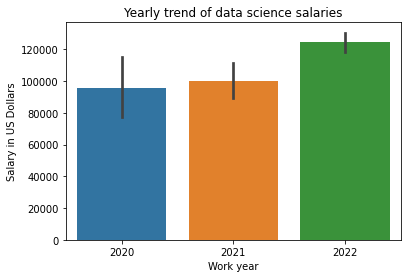

In [16]:
sns.barplot(x='work_year', y='salary_in_usd', data=df)
plt.title("Yearly trend of data science salaries")
plt.xlabel("Work year")
plt.ylabel('Salary in US Dollars')
plt.show()

Looking at the bar chart above, you will notice a spike in the average salaries for people in data related jobs between 2021 and 2022. This shows that data science salaries are increasing at an increasing rate.

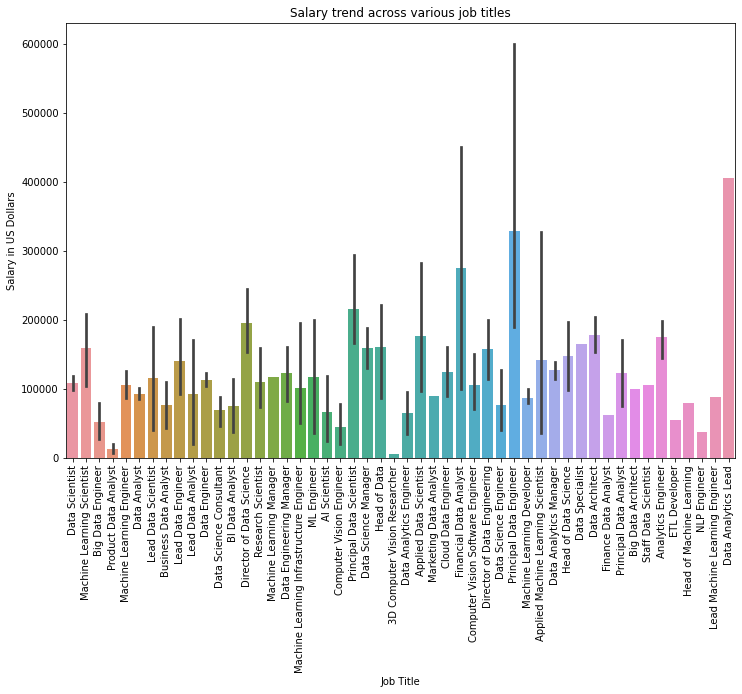

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x='job_title', y='salary_in_usd', data=df)
plt.title("Salary trend across various job titles")
plt.xlabel("Job Title")
plt.ylabel("Salary in US Dollars")
plt.xticks(rotation=90)
plt.show()

It is true that the chart above looks a bit populated but I was still able to draw the following insights from the visualization:
1. The top three most rewarding data related job titles are:
	1. Data Analytics Lead which peaked at about 400,000 US Dollars per annum.
    2. Principal Data Engineer
    3. Financial Data Analyst
   
2. The top three least rewarding data related job titles are:
	1. 3D Computer Vision Researcher which had an average salary of about 5400 US Dollars per annum.
    2. Product Data Analyst
    3. NLP Engineer

Now, let's look at the average salary of a data related employee.

In [18]:
# Calculate average salary

df.salary_in_usd.mean()

112297.86985172982

The avaerage salary is about 112,000 US Dollars per annum. That's pretty cool, right??

Now, according to Ziprecruiter.com, the average salary of an individual in the United States is 69,543 US Dollars while that of an average Nigerian in Lagos state is 70,088 US Dollars. Now comparing that to the average salary of data related employees, it is almost double that of an average civilian!! 

Let's explore the other features in this dataset to see what we'll find next.

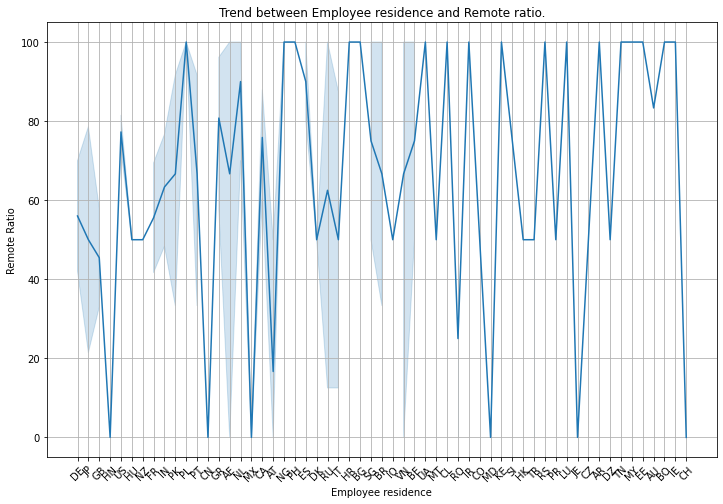

In [19]:
plt.figure(figsize=(12,8))
sns.lineplot(x='employee_residence', y='remote_ratio', data=df)
plt.title("Trend between Employee residence and Remote ratio.")
plt.xlabel("Employee residence")
plt.ylabel("Remote Ratio")
plt.xticks(rotation=45)
plt.grid()
plt.show()

<img src="https://www.researchgate.net/profile/Kibae-Kim/publication/288480686/figure/tbl1/AS:614062396297222@1523415292220/ISO-3166-1-Alpha-2-Two-Letter-Country-Codes.png">

<p>ISO 3166 country code chart. Courtesy: <a href="https://www.researchgate.net/figure/ISO-3166-1-Alpha-2-Two-Letter-Country-Codes_tbl1_288480686"> Research Gate</a>.</p>

Now I can visualize which countries have the highest remote ratios and which countries do not.
Some of the countries with the highest remote ratios are:
* Ireland (IE)
* Bolivia (BO)
* Nigeria (NG)
* Phillipines (PH)

Some of the countries with the lowest remote ratios are:
* Honduras (HN)
* China (CN)
* Moldova (MD)
* Jersey (JE)

In [20]:
import matplotlib.patches as mpatches

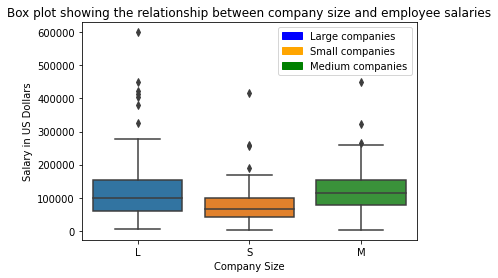

In [21]:
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
orange_patch = mpatches.Patch(color='orange', label='Small companies')
blue_patch = mpatches.Patch(color='blue', label='Large companies')
green_patch = mpatches.Patch(color='green', label='Medium companies')
plt.legend(handles=[blue_patch, orange_patch, green_patch])
plt.title("Box plot showing the relationship between company size and employee salaries")
plt.xlabel("Company Size")
plt.ylabel("Salary in US Dollars")
plt.show()

From the above plot, I can safely conclude that large-sized companies pay the employees better than small-sized companies. That means that there is a positive correlation between salary and company size and that the correlation is in the order of Small --> Medium --> Large.

In [22]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [23]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [24]:
text = " ".join(word for word in df.job_title)

In [25]:
word_cloud = WordCloud(collocations=False, background_color='white', colormap='Set1', random_state=2, stopwords=STOPWORDS).generate(text)

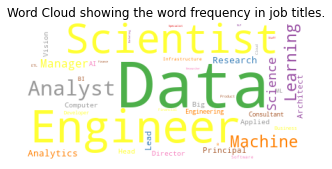

In [26]:
plt.figure(figsize=(5,5))
plt.imshow(word_cloud)
plt.axis("off")
plt.title("Word Cloud showing the word frequency in job titles.")
plt.show()

## Model selection and fitting.

At this point in my analysis, I wouldlike to build a model to predict the salary of anemployee given his/her features such as company size, remote ratio, etc.

In [27]:
# Import the required modules

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [28]:
# Splitting the dataset

X = df.drop(["salary_in_usd"], axis=1)
y = df["salary_in_usd"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8, test_size=0.3)

In [30]:
# Standardize the numeric columns

int_col = [X_train.select_dtypes("int64").columns]

ss = StandardScaler()

for col in int_col:
    ss.fit(X_train[col])
    X_train[col] = ss.transform(X_train[col])
    X_test[col] = ss.transform(X_test[col])

In [31]:
# Encode the object columns

obj_col = X_train.select_dtypes(include=[object]).columns

lab_en = LabelEncoder()

for col in obj_col:
    lab_en = lab_en.fit(df[col])
    X_train[col] = lab_en.transform(X_train[col])
    X_test[col] = lab_en.transform(X_test[col])

In [32]:
model_list = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

for model in model_list:
    model.fit(X_train, y_train)
    print(model, model.score(X_test, y_test))

LinearRegression() 0.27040390217772303
DecisionTreeRegressor() 0.907982884313569
RandomForestRegressor() 0.9698505201431546


From above, we can see that RandomForestRegressor is our best performing model. I will now proceed to perfoming hyperparameter tuning on this model. Hyperparameter tuning is generally used to improve the performance of a model and also increase it's accuracy score.

In [33]:
model = RandomForestRegressor()

random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

random_cv = RandomizedSearchCV(model, random_grid, cv=5)

In [34]:
random_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]})

In [35]:
random_cv.best_params_

{'n_estimators': 230,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [36]:
model = RandomForestRegressor(n_estimators=230, min_samples_split=5, min_samples_leaf=2, max_features="auto", max_depth=30, bootstrap=True)

In [37]:
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9684958718080351

I was able to build a model that could predict the salary of an employee in a data related field with an r-suared score of 0.966. 

## Conclusions.

I was able to draw some wonderful insights from this analysis.
1. Data science salaries are increasing at an increasing rate.

2. The highest paying countries are New Zealand and the United States while the least paying countries are Vietna, and Iran.

3. The job with the lowest salary is the 'Data Scientist' while the job with the highest paying salary is 'Principal Data Engineer'.

4. The top three most rewarding data related job titles are:
	1. Analytics Lead which peaked at about 400,000 US Dollars per annum.
	2. Principal Data Engineer
	3. Financial Data Analyst
    
5. The top three least rewarding data related job titles are:
    1. 3D Computer Vision Researcher which had an average salary of about 5400 US Dollars per annum.
    2. Product Data Analyst
    3. NLP Engineer
    
6. The average salary of a data-related employee is about 112,000 US Dollars.

7. Large sized companies are the most financially rewarding companies followed by medium sized companies then small sized companies.